In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

In [48]:
dataset = pd.read_csv("./Financial Distress.csv")
origDF = dataset.copy()

In [49]:
origDF.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


In [50]:
origDF.describe()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,...,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,182.084423,7.528322,1.040257,1.387820,0.129706,0.615769,8.681599e-01,0.154949,0.106717,0.784031,...,86.839822,91.920506,89.115908,17.780855,15.198708,-2.664305,19.714597,1.100488,13.122277,33.044935
std,117.024636,4.064016,2.652227,1.452926,0.120013,0.177904,5.719519e-01,0.124904,0.210555,1.033606,...,16.706209,64.656504,64.349382,2.040152,2.828648,8.192663,7.508588,2.666733,9.465907,13.714563
min,1.000000,1.000000,-8.631700,0.075170,-0.258080,0.016135,5.350000e-07,-0.269790,-0.627750,0.035160,...,54.806000,24.318000,23.776000,15.250000,12.000000,-20.200000,1.000000,-0.499220,1.000000,2.000000
25%,80.000000,4.000000,0.172275,0.952145,0.048701,0.501888,5.525575e-01,0.070001,-0.027754,0.436003,...,79.951000,39.800000,38.377000,16.000000,13.000000,-7.000000,14.000000,0.189912,6.000000,21.000000
50%,168.000000,7.000000,0.583805,1.183600,0.107530,0.638690,7.752450e-01,0.131830,0.104325,0.641875,...,90.000000,66.120000,59.471000,17.000000,14.500000,0.200000,20.000000,0.594765,11.000000,34.000000
75%,264.250000,11.000000,1.351750,1.506475,0.188685,0.749425,1.039000e+00,0.219570,0.231230,0.896773,...,93.883000,130.500000,132.400000,20.000000,16.000000,2.100000,26.000000,1.355050,17.000000,44.000000
max,422.000000,14.000000,128.400000,51.954000,0.749410,0.967900,6.835600e+00,0.858540,0.929550,38.836000,...,120.870000,227.500000,214.500000,22.000000,22.000000,8.600000,37.000000,128.400000,49.000000,74.000000


In [51]:
origDF.x80.unique()

array([22, 29, 25, 12, 23,  9, 28, 14, 11, 18, 26, 21,  3, 20, 15,  7, 24,
       19, 27,  1,  4, 17,  6,  8,  5,  2, 16, 13, 10, 30, 31, 32, 34, 35,
       36, 33, 37], dtype=int64)

## Create label

In [52]:
origDF["Label"] = np.where(origDF["Financial Distress"] > -0.5, 0, 1)

In [73]:
origDF["Label"].sum()

136

In [74]:
origDF["Label"].count()

3672

## Remove irrelevant columns

In [53]:
dfWithTime = origDF.drop(columns=["Financial Distress", "Company"])
dfWithoutTime = origDF.drop(columns=["Time"])

**Will need to apply one-hot encoding to x80**

Also create binary label from FInancial Distress column and remove Financial Distress, company and time from training set

# Data Exploration

In [56]:
df = dfWithoutTime.copy()

C:\Users\alexk\AppData\Local\Continuum\anaconda3\envs\MLEnvironment\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


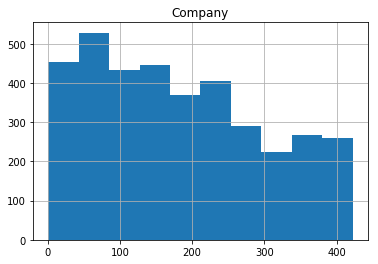

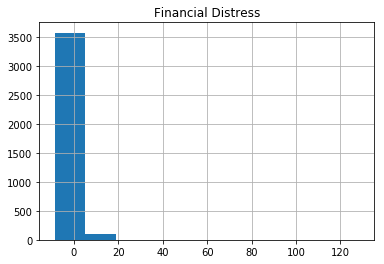

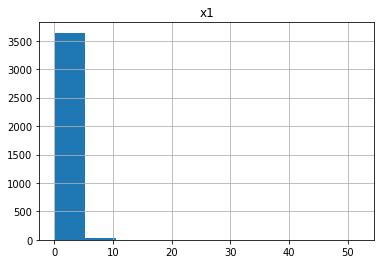

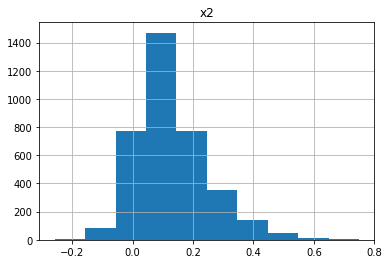

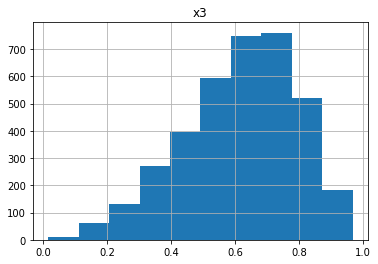

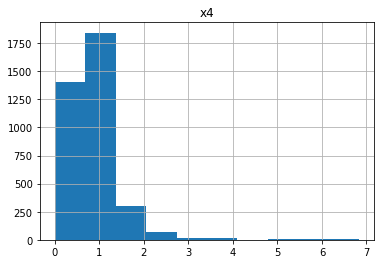

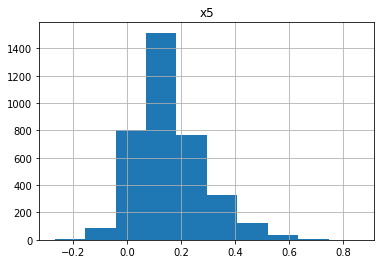

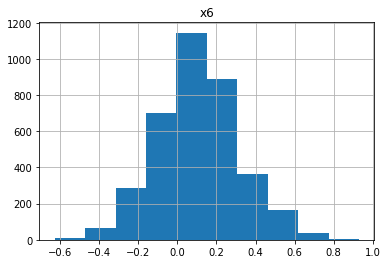

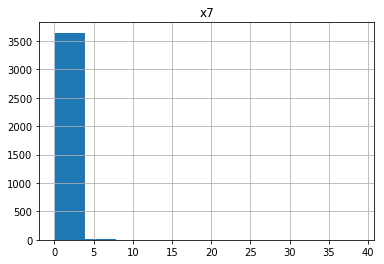

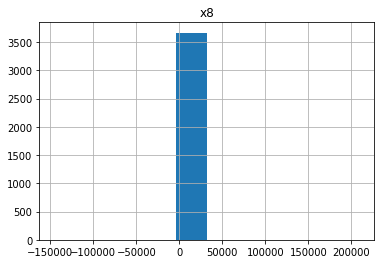

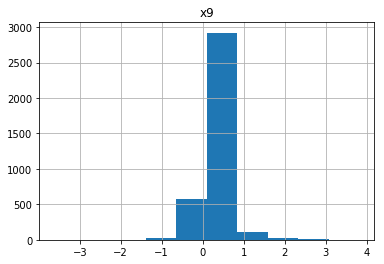

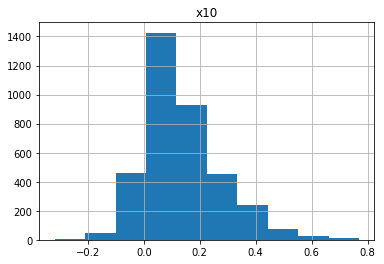

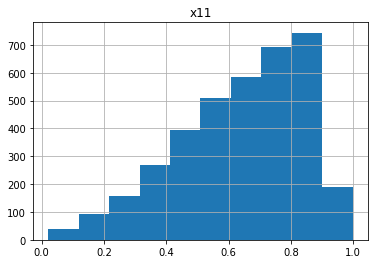

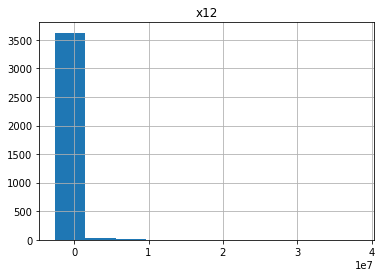

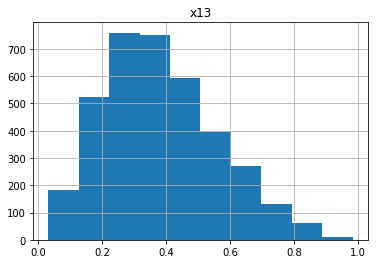

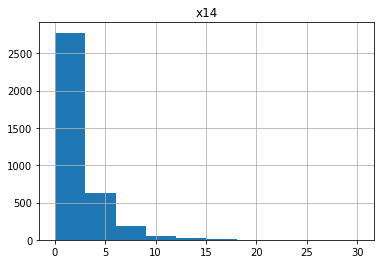

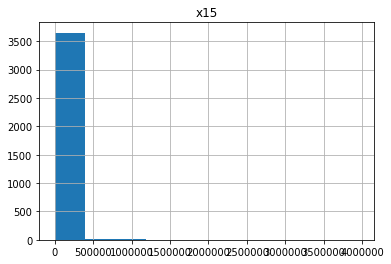

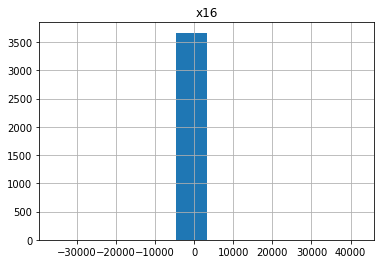

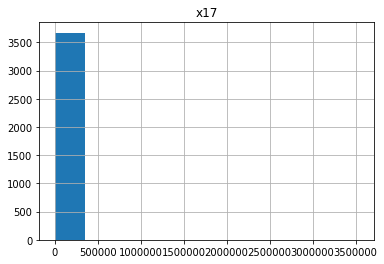

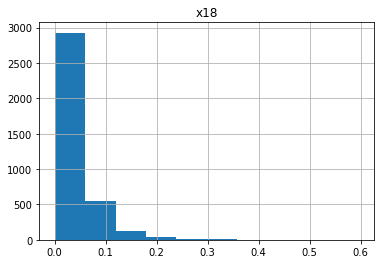

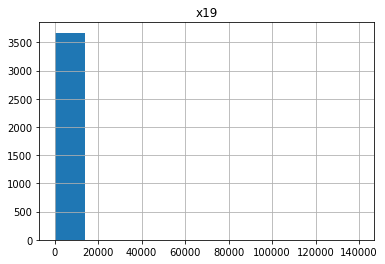

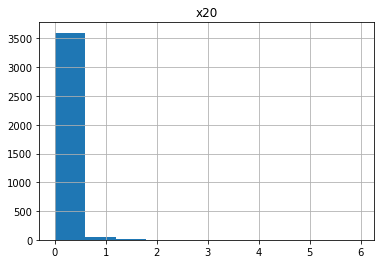

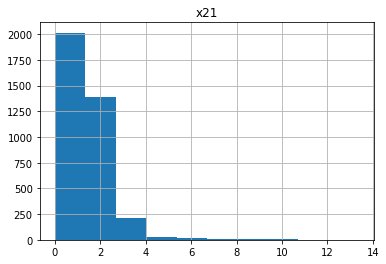

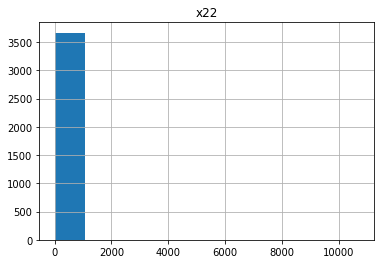

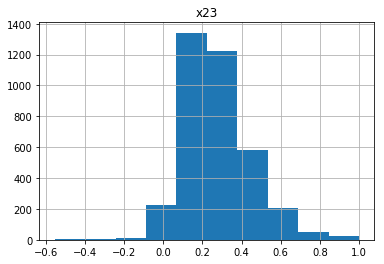

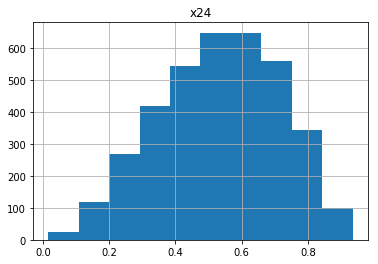

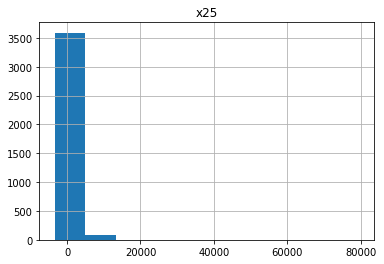

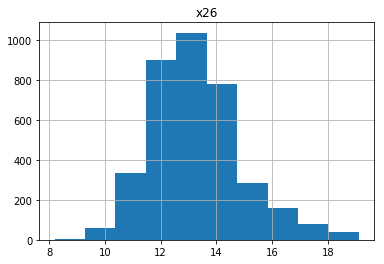

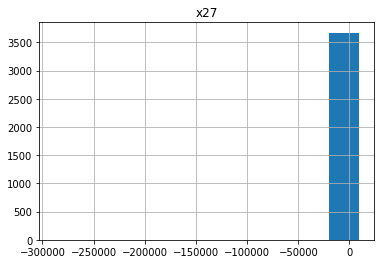

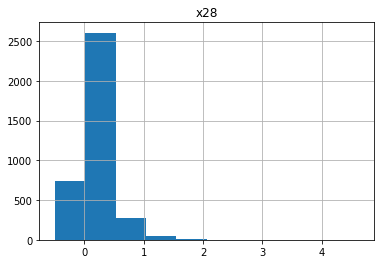

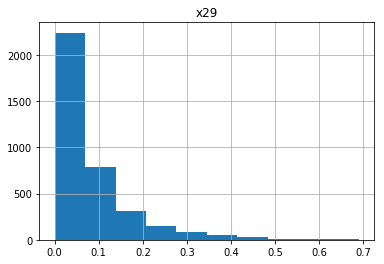

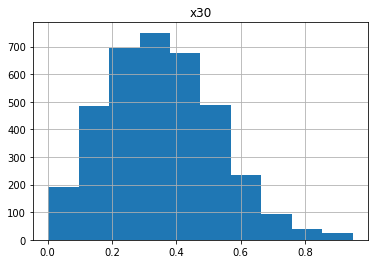

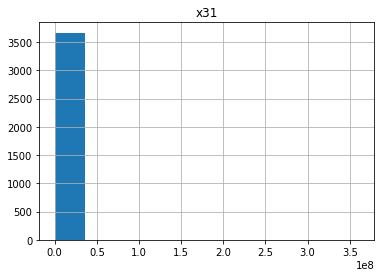

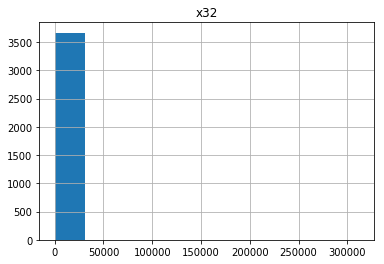

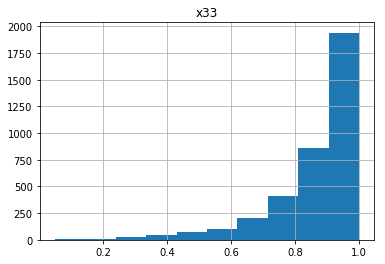

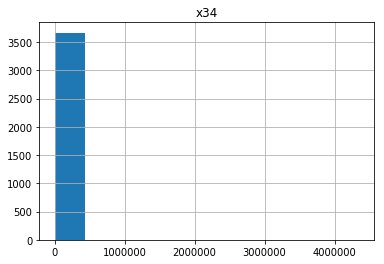

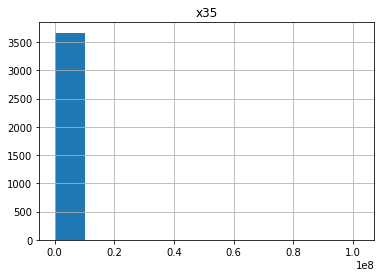

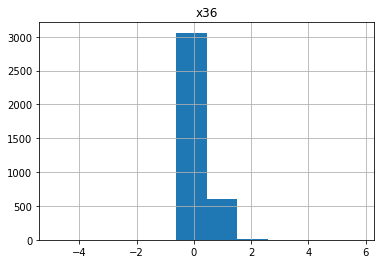

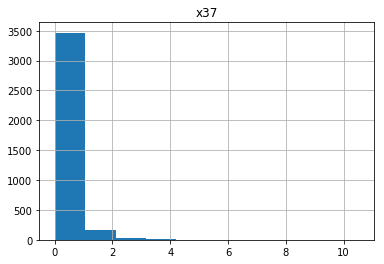

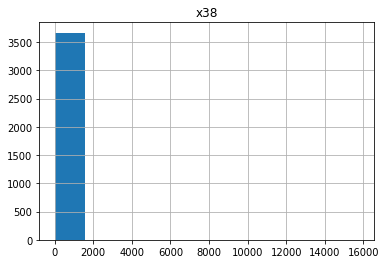

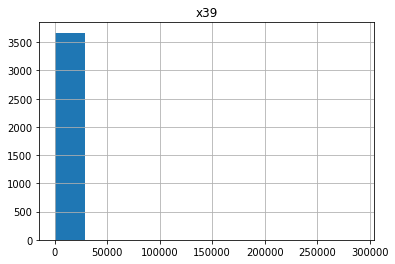

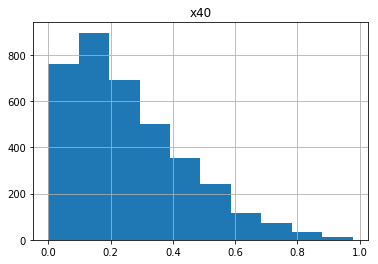

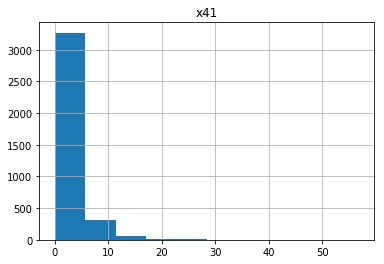

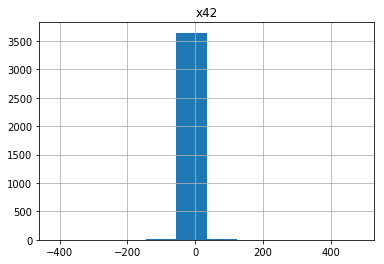

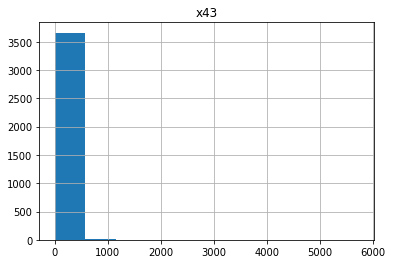

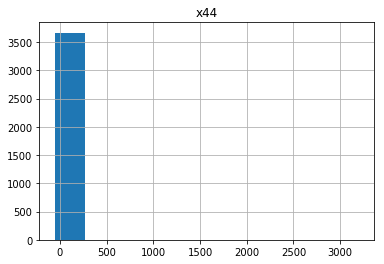

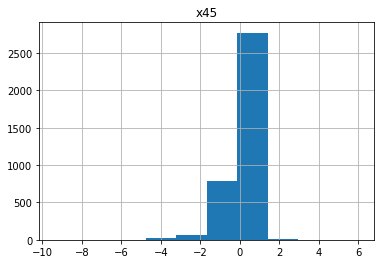

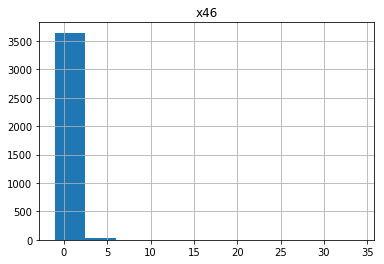

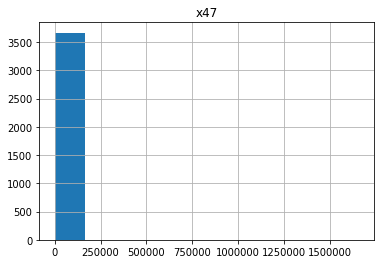

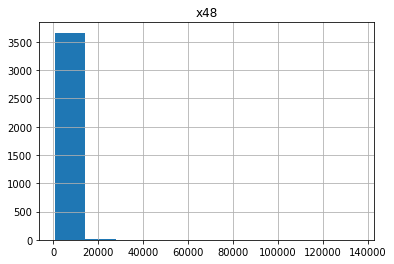

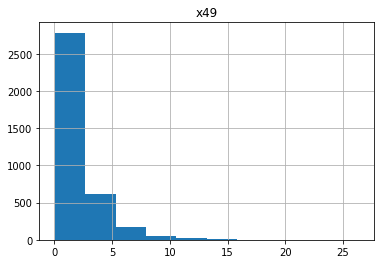

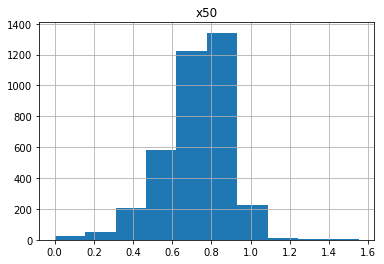

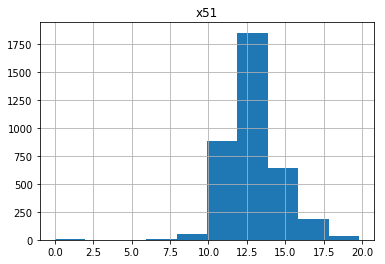

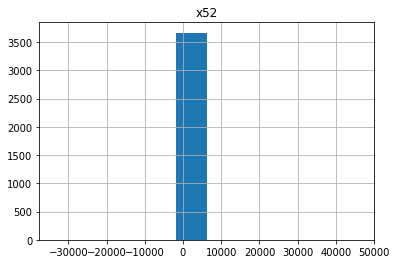

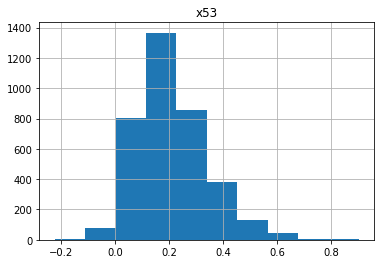

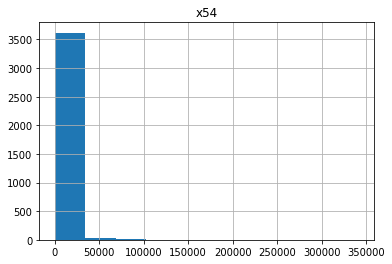

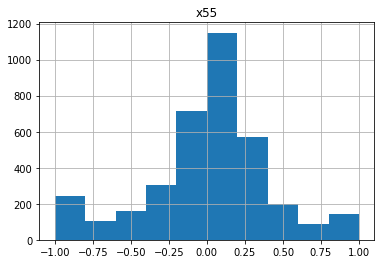

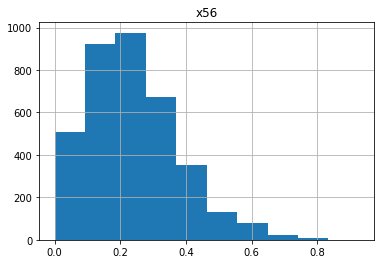

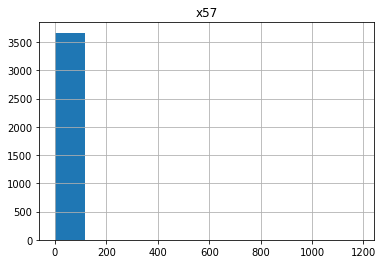

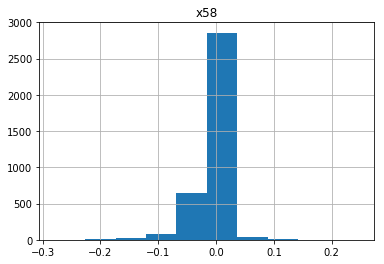

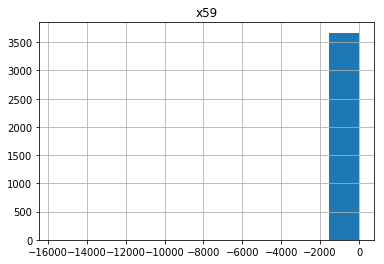

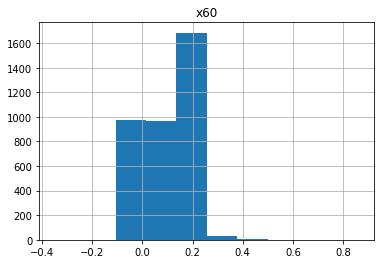

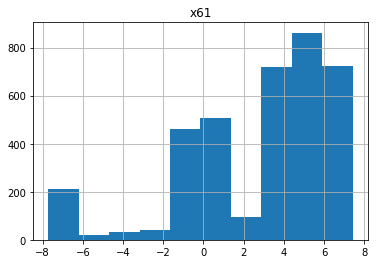

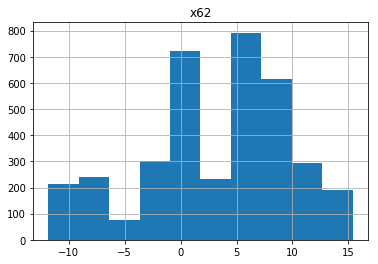

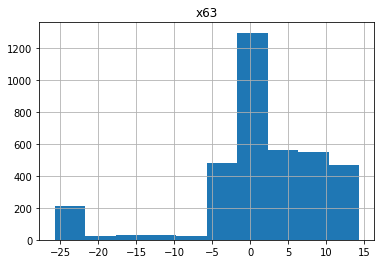

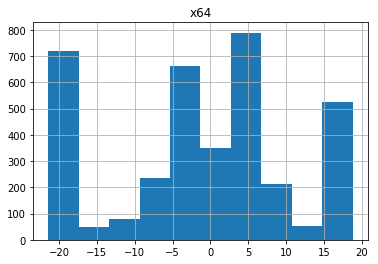

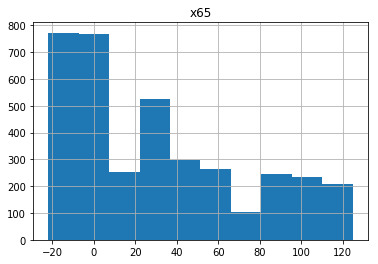

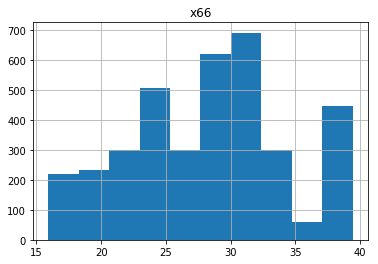

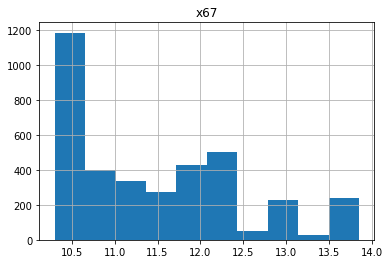

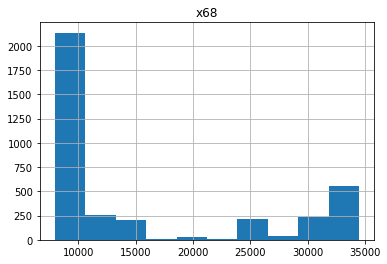

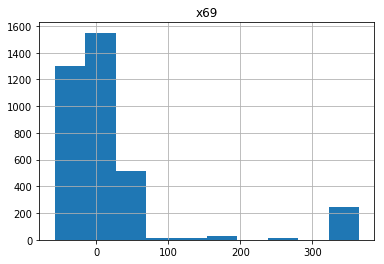

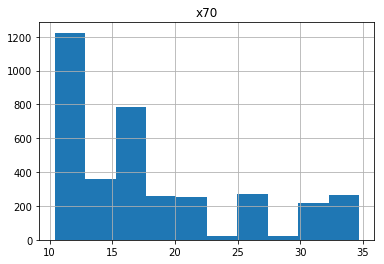

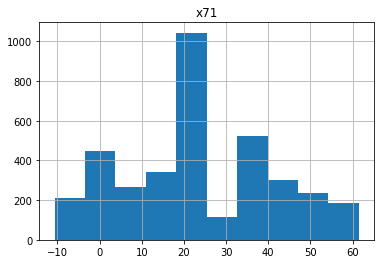

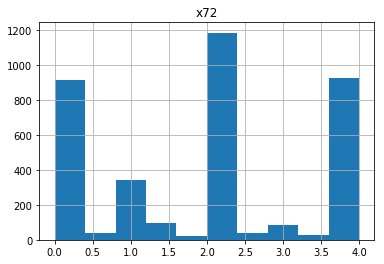

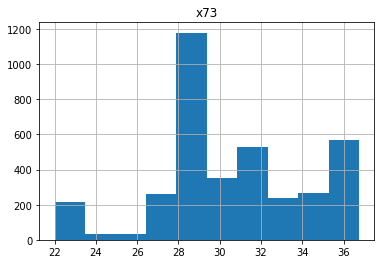

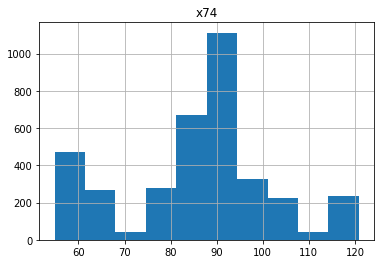

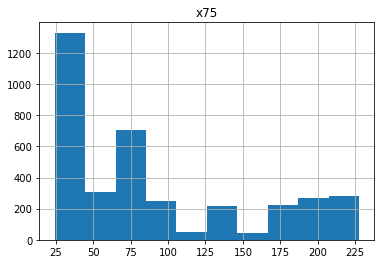

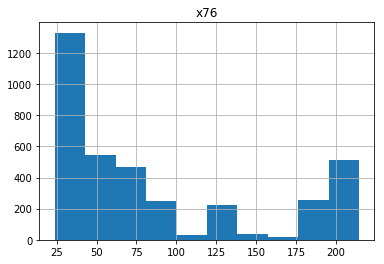

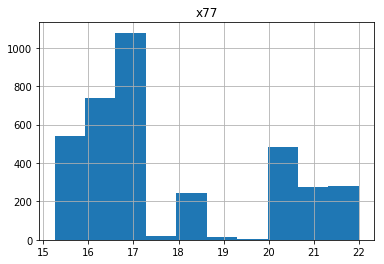

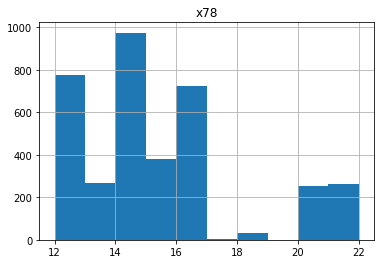

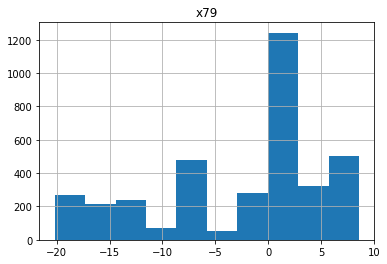

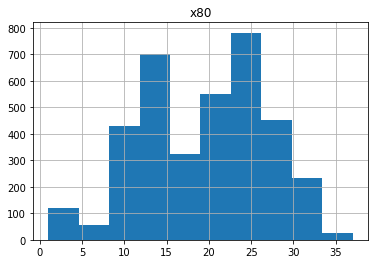

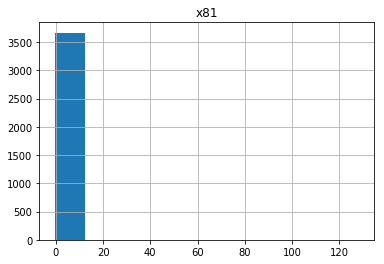

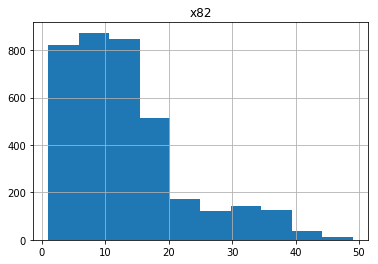

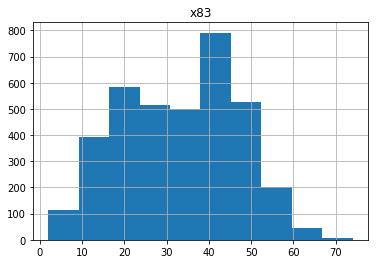

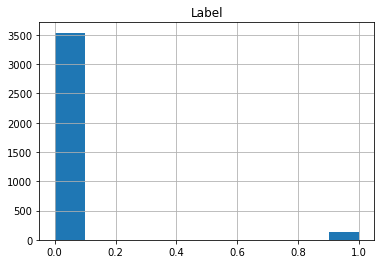

In [57]:
for column in df.columns:
    df[[column]].hist()

# Run models without any procesing

## Linear Regression

In [107]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split 
lr = SGDClassifier()

In [108]:
X = df.values
y = df['Label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [109]:
lr.fit(X_train, y_train)

C:\Users\alexk\AppData\Local\Continuum\anaconda3\envs\MLEnvironment\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [110]:
y_pred = lr.predict(X_test)

In [111]:
perc_distressed = y_pred.sum()/len(y_pred)
print('Predicted distressed ',perc_distressed)

Predicted distressed  0.00980392156862745


In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [119]:
def print_scores(y_test_, y_pred_):
    print(f'Accuracy: {accuracy_score(y_test_, y_pred_)}')
    print(f'Precision: {precision_score(y_test_, y_pred_)}')
    print(f'Recall: {recall_score(y_test_, y_pred_)}')
    print(f'ROC AUC: {roc_auc_score(y_test_, y_pred_)}')
    tn, fp, fn, tp = confusion_matrix(y_test_, y_pred_).ravel()
    print('TP: {0: >5d}   FP {1: >5d}'.format(tp, fp))
    print('TN: {0: >5d}   FN {1: >5d}'.format(tn, fn))

print_scores(y_test, y_pred)

Accuracy: 0.9651416122004357
Precision: 0.1111111111111111
Recall: 0.04
ROC AUC: 0.5155207166853304
TP:     1   FP     8
TN:   885   FN    24


Precision: 0.2


Recall: 0.12121212121212122


ROC AUC: 0.5515665125834617


TP: 4 FP 16
TN: 869 FN 29


TP: 4 FP 16
TN: 869 FN 29
